# Monthly domain-average MLD time series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean as cmo
import glob
from tqdm import tqdm
import sys
import calendar

In [2]:
x_array = np.arange(0, 1122*2500, 2500)
y_array = np.arange(20*2500, 430*2500, 2500)
x_rho, y_rho = np.meshgrid(x_array, y_array)

In [3]:
case_name = 'Strong'

In [4]:
heat_balance_files_strong = glob.glob('../monthly_ml_heat_budget_data_small_mesoscale/' 
                                      + case_name + '/monthly_ml_heat_balance_2016-*_' + case_name + 'Eddies.nc')
heat_balance_files_strong = sorted(heat_balance_files_strong)
heat_balance_files_strong

['../monthly_ml_heat_budget_data_small_mesoscale/Strong/monthly_ml_heat_balance_2016-01_StrongEddies.nc',
 '../monthly_ml_heat_budget_data_small_mesoscale/Strong/monthly_ml_heat_balance_2016-02_StrongEddies.nc',
 '../monthly_ml_heat_budget_data_small_mesoscale/Strong/monthly_ml_heat_balance_2016-03_StrongEddies.nc',
 '../monthly_ml_heat_budget_data_small_mesoscale/Strong/monthly_ml_heat_balance_2016-04_StrongEddies.nc',
 '../monthly_ml_heat_budget_data_small_mesoscale/Strong/monthly_ml_heat_balance_2016-05_StrongEddies.nc',
 '../monthly_ml_heat_budget_data_small_mesoscale/Strong/monthly_ml_heat_balance_2016-06_StrongEddies.nc',
 '../monthly_ml_heat_budget_data_small_mesoscale/Strong/monthly_ml_heat_balance_2016-07_StrongEddies.nc',
 '../monthly_ml_heat_budget_data_small_mesoscale/Strong/monthly_ml_heat_balance_2016-08_StrongEddies.nc',
 '../monthly_ml_heat_budget_data_small_mesoscale/Strong/monthly_ml_heat_balance_2016-09_StrongEddies.nc',
 '../monthly_ml_heat_budget_data_small_mesosca

In [5]:
strong_ds = xr.open_mfdataset(heat_balance_files_strong, concat_dim = 'ocean_time',combine='nested')

In [6]:
case_name = 'Weak'

In [7]:
heat_balance_files_weak = glob.glob('../monthly_ml_heat_budget_data_small_mesoscale/' + case_name + '/monthly_ml_heat_balance_2016-*_' + case_name + 'Eddies.nc')
heat_balance_files_weak = sorted(heat_balance_files_weak)
heat_balance_files_weak

['../monthly_ml_heat_budget_data_small_mesoscale/Weak/monthly_ml_heat_balance_2016-01_WeakEddies.nc',
 '../monthly_ml_heat_budget_data_small_mesoscale/Weak/monthly_ml_heat_balance_2016-02_WeakEddies.nc',
 '../monthly_ml_heat_budget_data_small_mesoscale/Weak/monthly_ml_heat_balance_2016-03_WeakEddies.nc',
 '../monthly_ml_heat_budget_data_small_mesoscale/Weak/monthly_ml_heat_balance_2016-04_WeakEddies.nc',
 '../monthly_ml_heat_budget_data_small_mesoscale/Weak/monthly_ml_heat_balance_2016-05_WeakEddies.nc',
 '../monthly_ml_heat_budget_data_small_mesoscale/Weak/monthly_ml_heat_balance_2016-06_WeakEddies.nc',
 '../monthly_ml_heat_budget_data_small_mesoscale/Weak/monthly_ml_heat_balance_2016-07_WeakEddies.nc',
 '../monthly_ml_heat_budget_data_small_mesoscale/Weak/monthly_ml_heat_balance_2016-08_WeakEddies.nc',
 '../monthly_ml_heat_budget_data_small_mesoscale/Weak/monthly_ml_heat_balance_2016-09_WeakEddies.nc',
 '../monthly_ml_heat_budget_data_small_mesoscale/Weak/monthly_ml_heat_balance_2016

In [8]:
weak_ds = xr.open_mfdataset(heat_balance_files_weak, concat_dim = 'ocean_time',combine='nested')

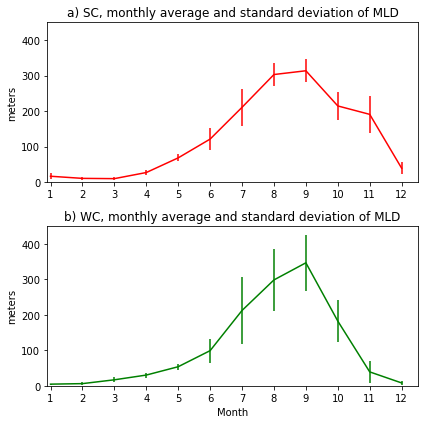

In [10]:
figure = plt.figure(figsize = (6, 6))
plt.subplot(211)
#plt.plot(np.arange(1, 13), -1 * strong_ds.MLD[:, 60:350, 60:1062].mean(axis = (-1, -2)), color = 'red')
plt.errorbar(np.arange(1, 13), -1 * strong_ds.MLD[:, 60:350, 60:1062].mean(axis = (-1, -2)), yerr = -1 * strong_ds.MLD[:, 60:350, 60:1062].std(axis = (-1, -2)), color = 'red')
plt.xlim(.9, 12.5)
plt.ylim(0, 450)
plt.title('a) SC, monthly average and standard deviation of MLD')
plt.ylabel('meters')
plt.xticks(range(1, 13))

plt.subplot(212)
#plt.plot(np.arange(1, 13), -1 * weak_ds.MLD[:, 60:350, 60:1062].mean(axis = (-1, -2)), color = 'green')
plt.errorbar(np.arange(1, 13), -1 * weak_ds.MLD[:, 60:350, 60:1062].mean(axis = (-1, -2)), yerr = -1 * weak_ds.MLD[:, 60:350, 60:1062].std(axis = (-1, -2)), color = 'green')
plt.xlim(.9, 12.5)
plt.ylim(0, 450)
plt.title('b) WC, monthly average and standard deviation of MLD')
plt.xlabel('Month')
plt.ylabel('meters')
plt.xticks(range(1, 13))

plt.tight_layout()
plt.savefig('./Fig04_MLD_time_series.pdf')